In [2]:
import streamlit as st
import gspread
import pandas as pd
from googleapiclient.discovery import build
from google.oauth2.service_account import Credentials
from datetime import date

In [6]:
def init_sheets_client():
    SERVICE_ACCOUNT_FILE = "fabled-pivot-446609-e4-d1fb55e9792a.json"
    SCOPES_SHEETS = [
        "https://www.googleapis.com/auth/spreadsheets",
        "https://www.googleapis.com/auth/drive",
    ]
    credentials_sheets = Credentials.from_service_account_file(
        SERVICE_ACCOUNT_FILE, scopes=SCOPES_SHEETS
    )
    sheets_client = gspread.authorize(credentials_sheets) 
    return sheets_client
def read_google_sheet():
    try:
        sheets_client = init_sheets_client()
        sheet = sheets_client.open("2025 Task Management").sheet1 
        data = sheet.get_all_records()  
        df = pd.DataFrame(data) 
        return df
    except Exception as e:
        print(f"Error: {e}")
        return None

In [7]:
df = read_google_sheet()

In [9]:
df[df['Task'] == "Hello"].iloc[0]['Checkbox']

0

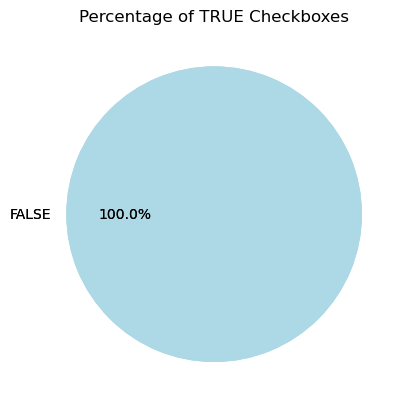

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

# Calculate the counts of TRUE and FALSE checkboxes
checkbox_counts = df['Checkbox'].value_counts()

# Plot the pie chart
checkbox_counts.plot.pie(autopct='%1.1f%%', labels=['FALSE', 'TRUE'], colors=['lightblue', 'lightgreen'])
plt.title('Percentage of TRUE Checkboxes')
plt.ylabel('')  # Hide the y-label
plt.show()
